# <div align="center"> 🏅 Tokyo Olympics Analysis 🏅</div>
<p style="text-align:center">
<img src="https://cdn.dribbble.com/users/1747913/screenshots/10133490/olympiclogo2.gif" width="1080px">
  </p>



<p style="text-align:center">

<img src = "https://res.cloudinary.com/ocsdigitalprd/image/private/f_auto,t_preserve_aspect_desktop/v1628423917/primary/xddklgkvottmoegkesuu" width="1080px">
</p>


<p style="text-align:center">


<img src="https://gonintendo.com/uploads/file_upload/upload/61100/jewel-changi-airport-pokemon-parade-dancing-at-the-north-canyon-2-mod.jpg" width="1080px">
</p>


In [1]:
import pandas as pd 
import numpy as np 
import math
import glob
import os

# visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/2021-olympics-medals-in-tokyo/Tokyo Medals 2021.csv')
df.head()

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3


In [3]:
df.shape

(93, 6)

In [4]:
df.columns

Index(['Country', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total',
       'Rank By Total'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country        93 non-null     object
 1   Gold Medal     93 non-null     int64 
 2   Silver Medal   93 non-null     int64 
 3   Bronze Medal   93 non-null     int64 
 4   Total          93 non-null     int64 
 5   Rank By Total  93 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.5+ KB


In [6]:
df.isnull().sum()

Country          0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank By Total    0
dtype: int64

In [7]:
df.describe()

,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
count,93.000000,93.000000,93.000000,93.000000,93.000000
mean,3.655914,3.634409,4.322581,11.612903,43.494624
std,7.022471,6.626339,6.210372,19.091332,24.171769
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,2.000000,23.000000
50%,1.000000,1.000000,2.000000,4.000000,47.000000
75%,3.000000,4.000000,5.000000,11.000000,66.000000
max,39.000000,41.000000,33.000000,113.000000,77.000000


<AxesSubplot:xlabel='Total', ylabel='Density'>

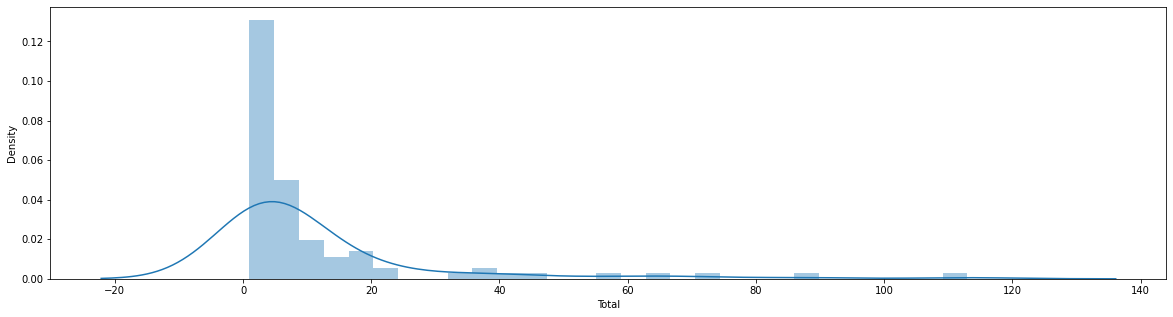

In [8]:
# Histogram
f, ax = plt.subplots(figsize=(20,5))
sns.distplot(df['Total'])

<AxesSubplot:xlabel='Total', ylabel='Density'>

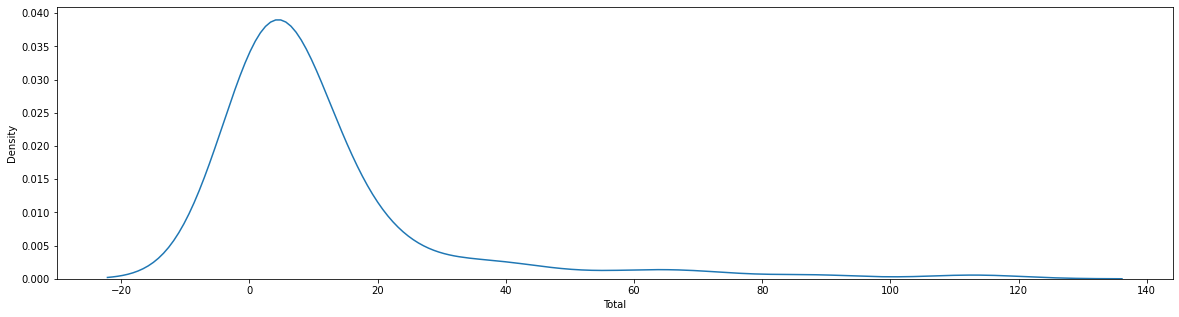

In [9]:
# KDE Plot 
f, ax = plt.subplots(figsize=(20,5))
sns.kdeplot(df['Total'])

In [10]:
df['Country'].value_counts().index[:10]

Index(['Great Britain', 'Hong Kong, China', 'Dominican Republic', 'Portugal',
       'Egypt', 'ROC', 'Poland', 'Qatar', 'Czech Republic', 'Germany'],
      dtype='object')

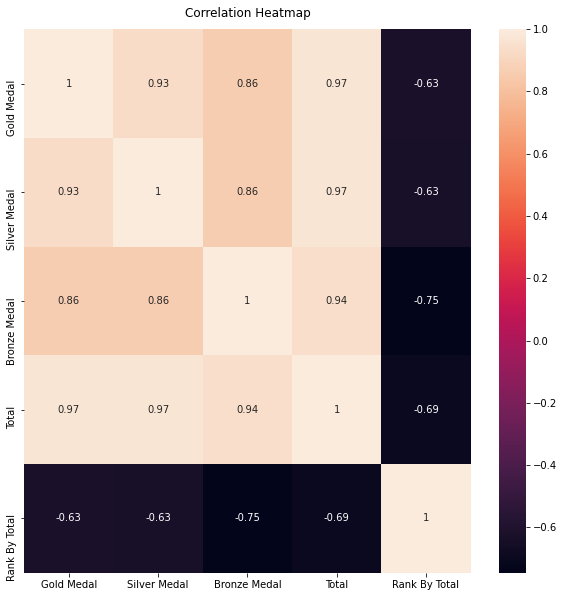

In [11]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='Total', ylabel='Country'>

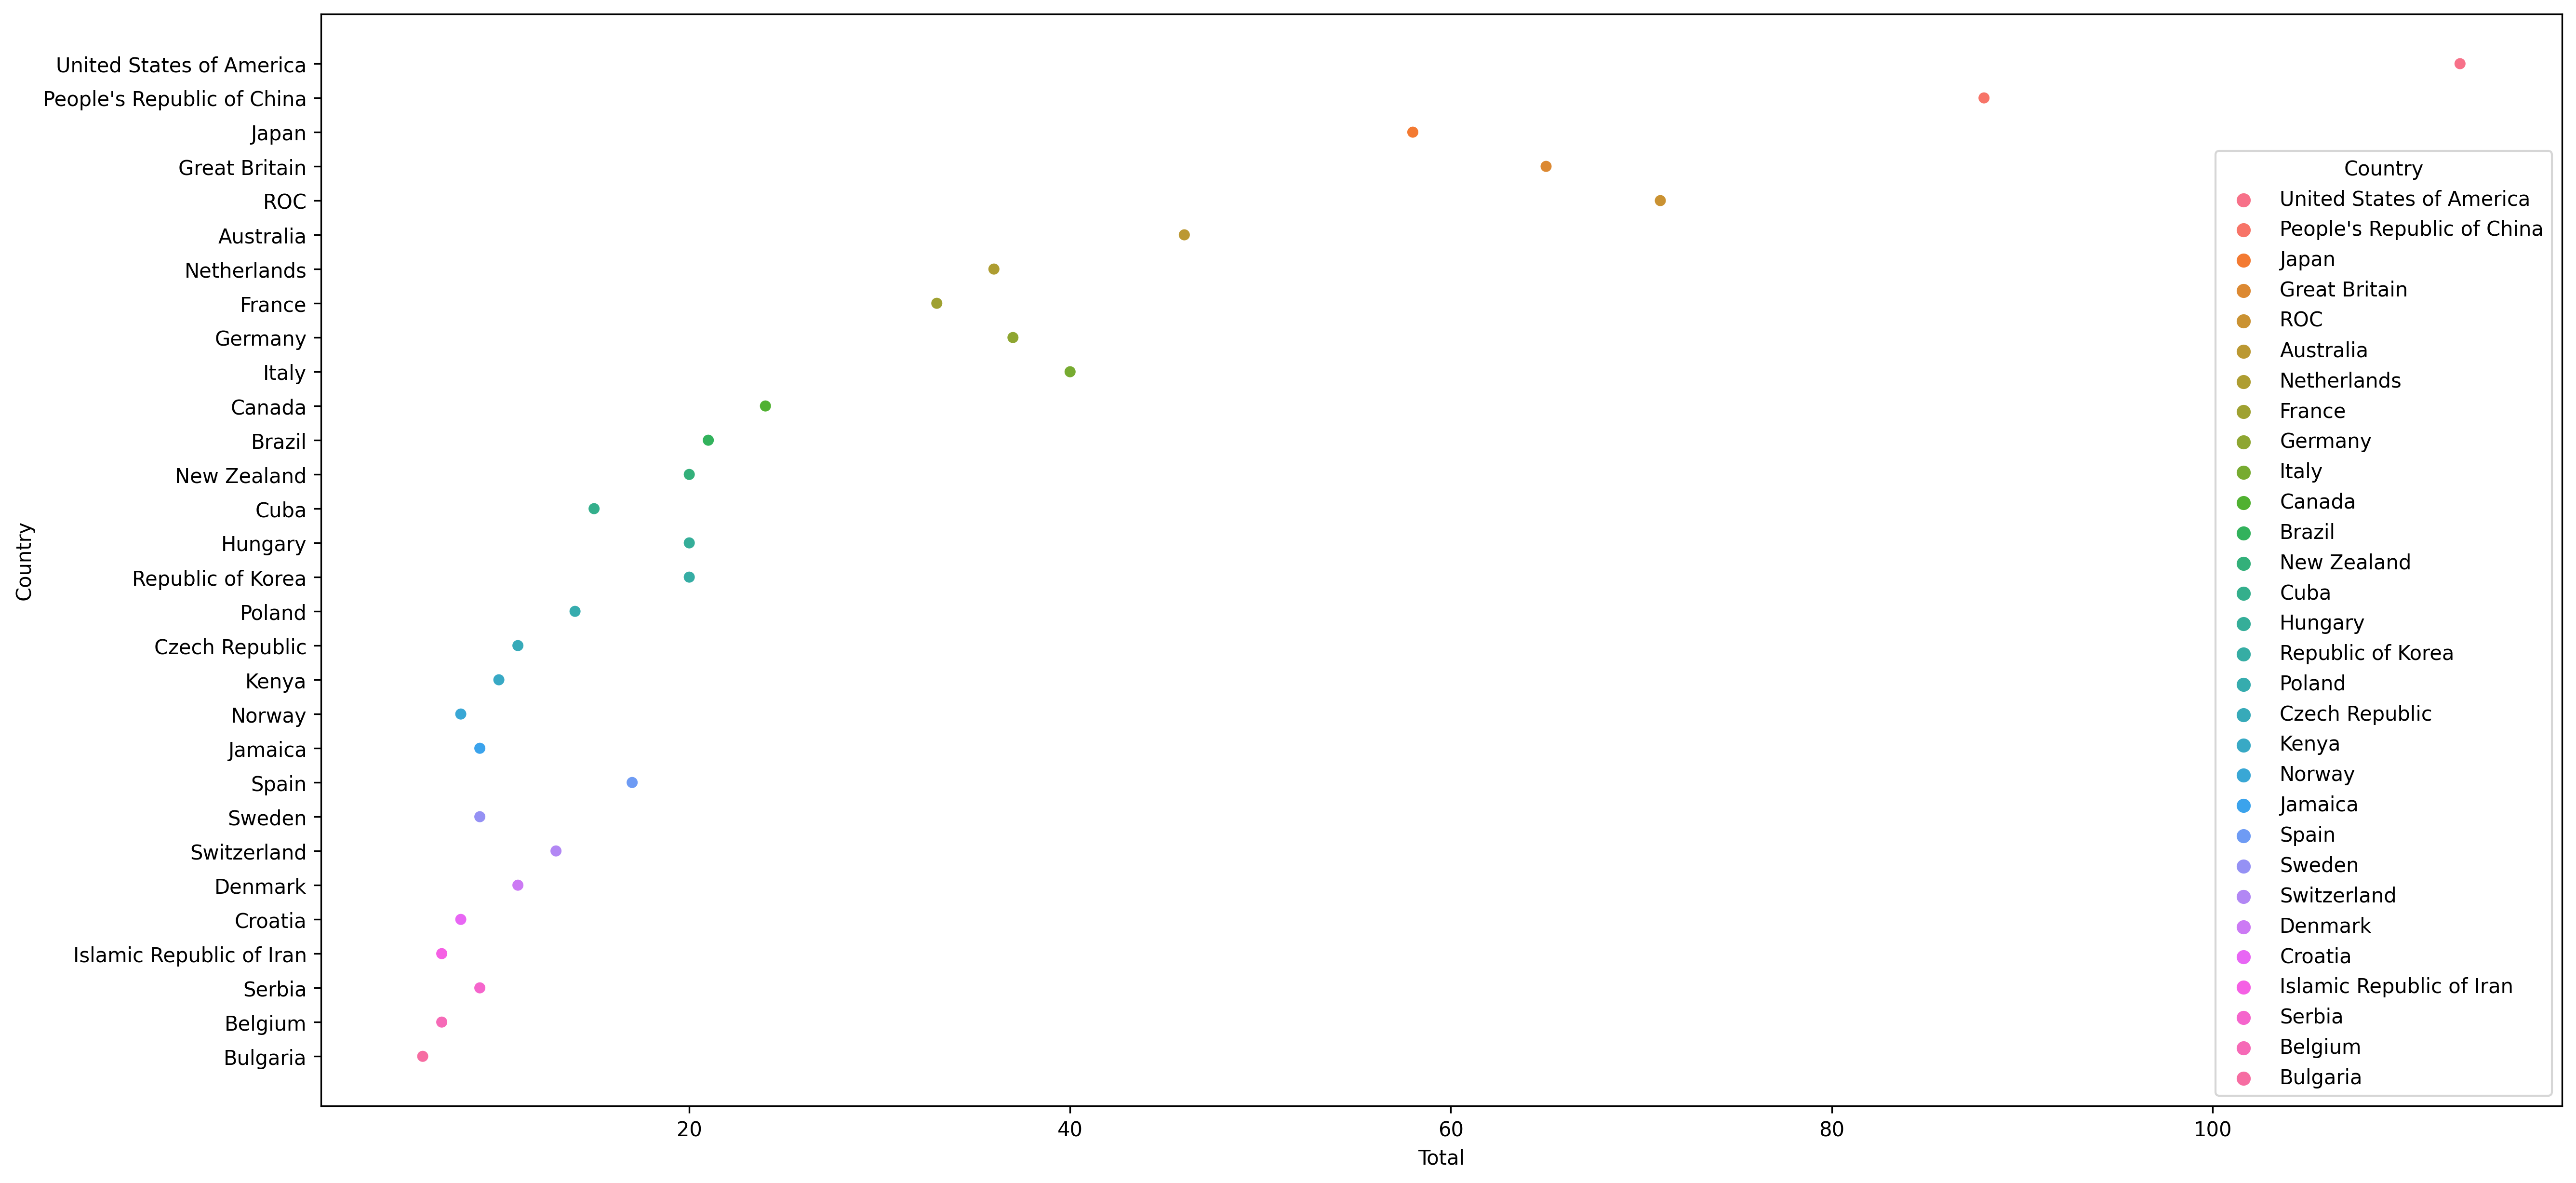

In [12]:
plt.figure(figsize=(20,10),dpi=300)
sns.scatterplot(x='Total',y='Country',hue='Country',data=df[:30])


<AxesSubplot:xlabel='Total', ylabel='Country'>

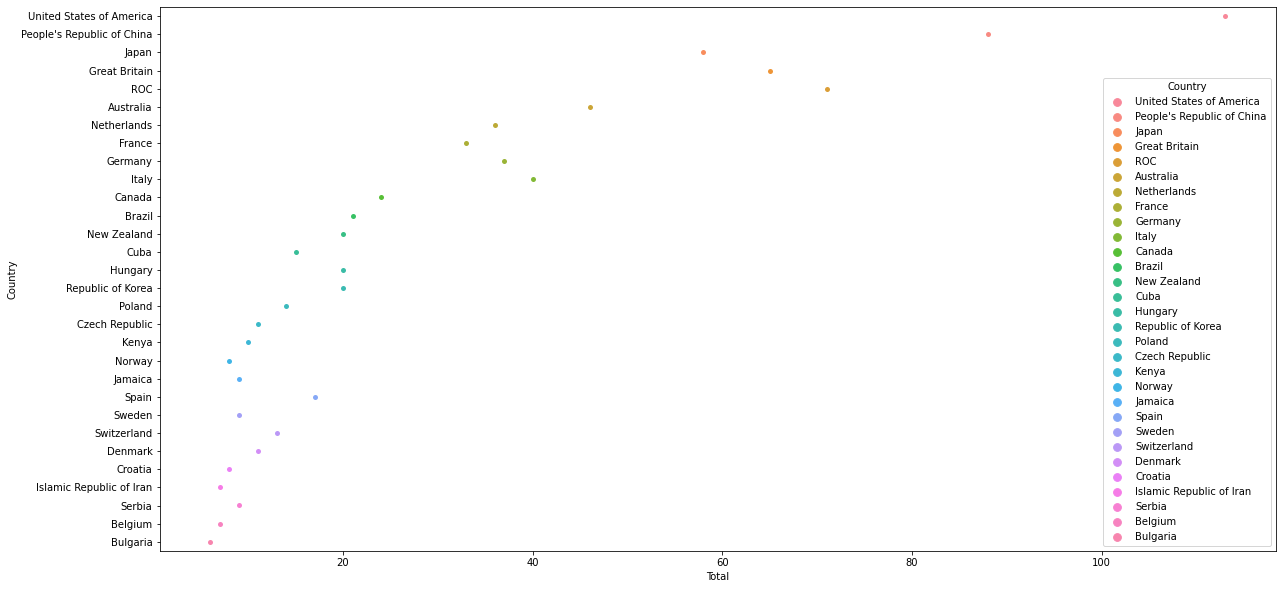

In [13]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Total',y='Country',hue='Country',data=df[:30])

<AxesSubplot:xlabel='Gold Medal', ylabel='Country'>

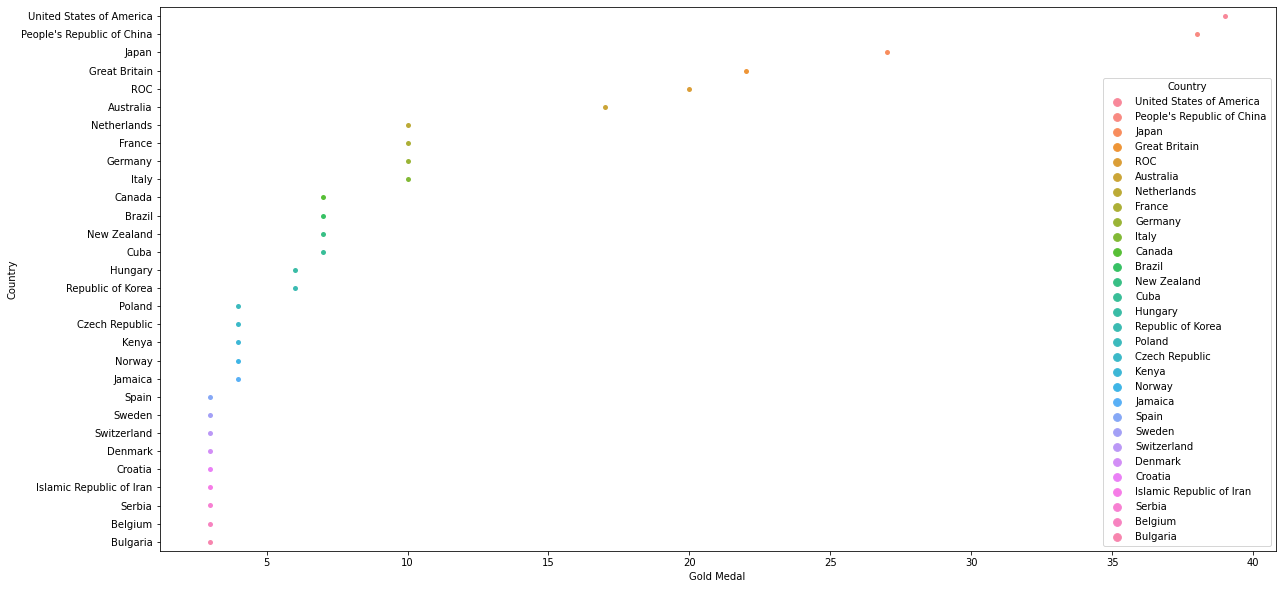

In [14]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Gold Medal',y='Country',hue='Country',data=df[:30])

<AxesSubplot:xlabel='Silver Medal', ylabel='Country'>

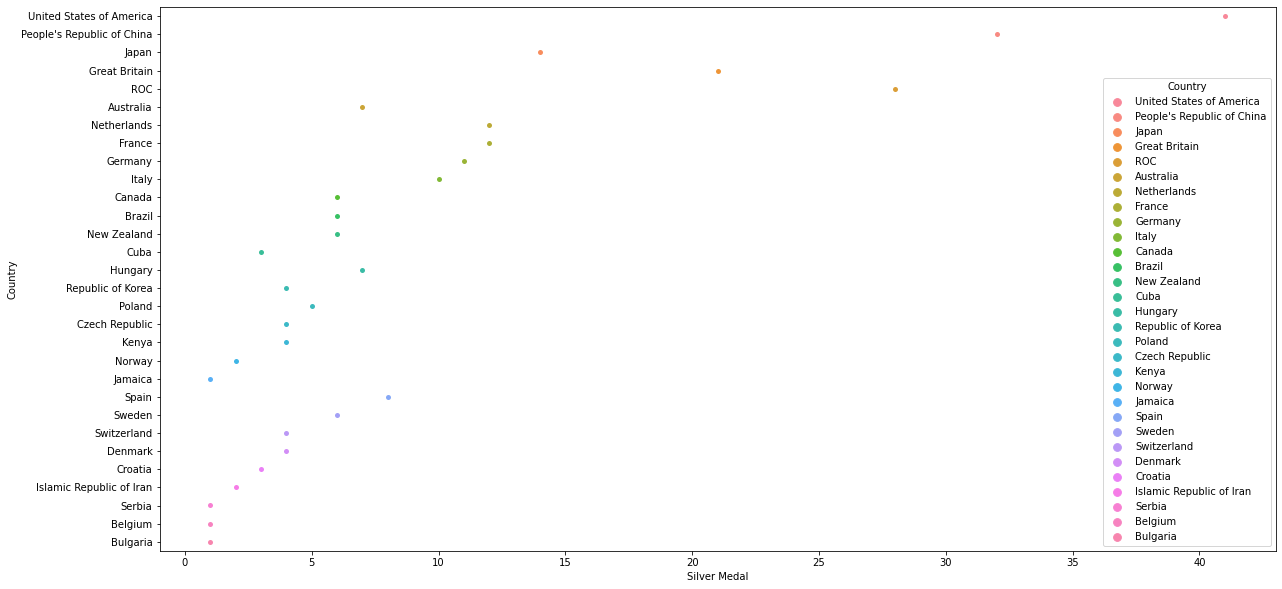

In [15]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Silver Medal',y='Country',data=df[:30],hue='Country')

<AxesSubplot:xlabel='Bronze Medal', ylabel='Country'>

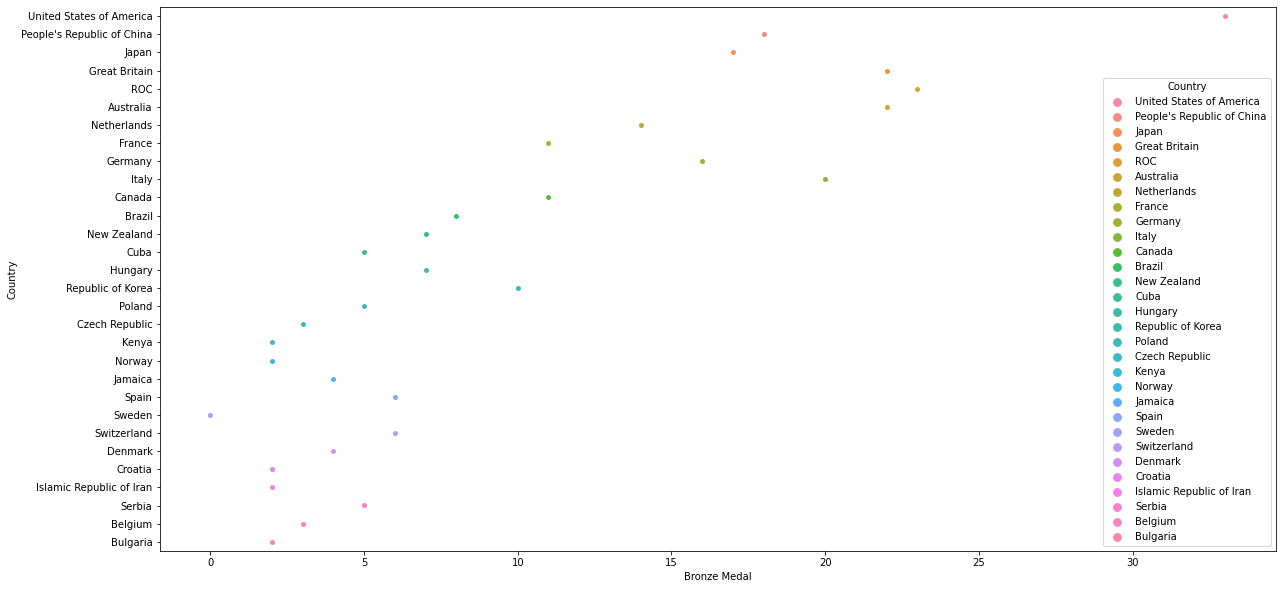

In [16]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='Bronze Medal',y='Country',data=df[:30],hue='Country')

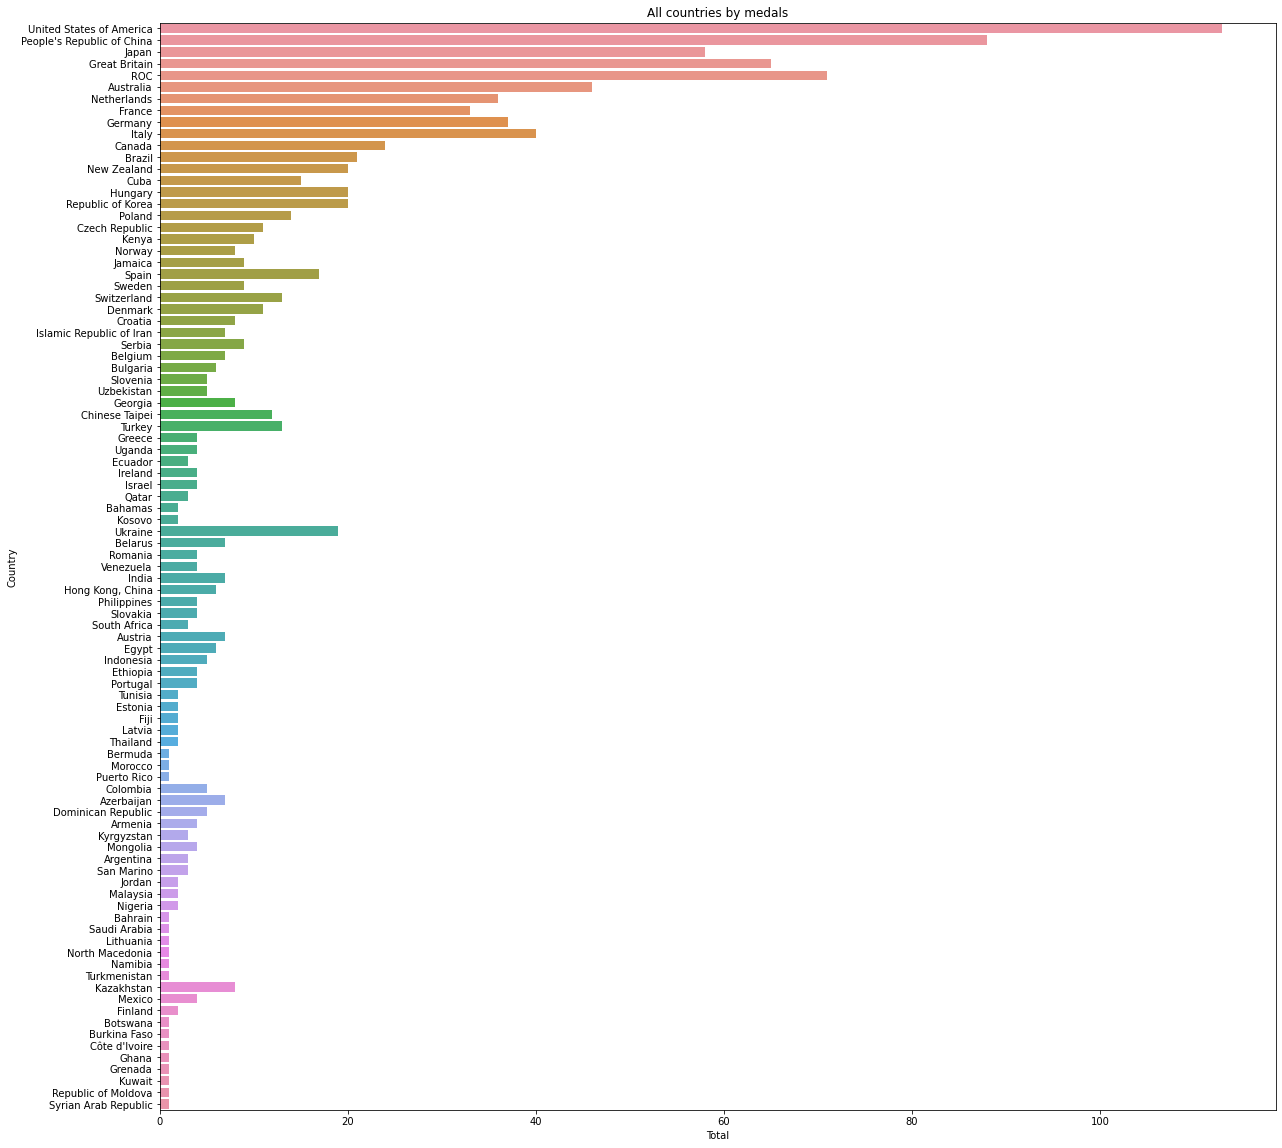

In [17]:
plt.figure(figsize=(20, 20))
plt.tight_layout()
sns.barplot(x='Total',y='Country',data=df)
plt.title('All countries by medals')
plt.show()



# <div align="center"> 🥇Top 15 Countries - Gold Medals🥇 </div>

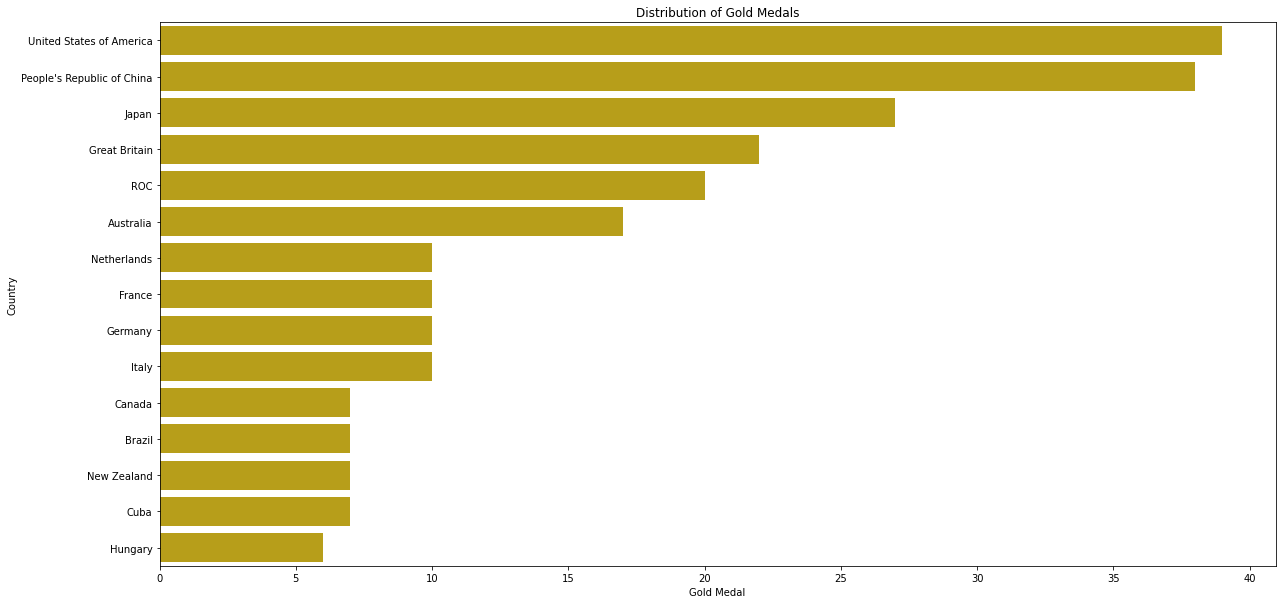

In [18]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='Gold Medal',y='Country',color = '#D1B000',data=df[:15])
plt.title('Distribution of Gold Medals')
plt.show()



# <div align="center">  🥈 Top 15 Countries - Silver Medals 🥈</div>

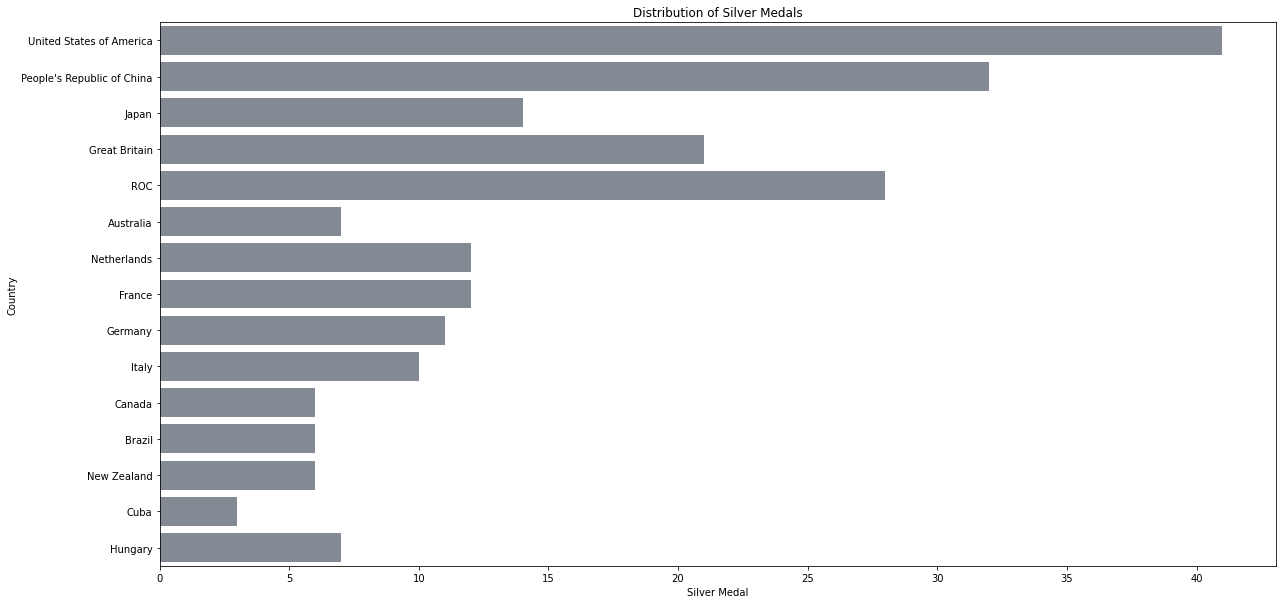

In [19]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='Silver Medal',y='Country',color='#828A95',data=df[:15])
plt.title('Distribution of Silver Medals')
plt.show()



# <div align="center"> 🥉 Top 15 Countries - Bronze Medals 🥉 </div>

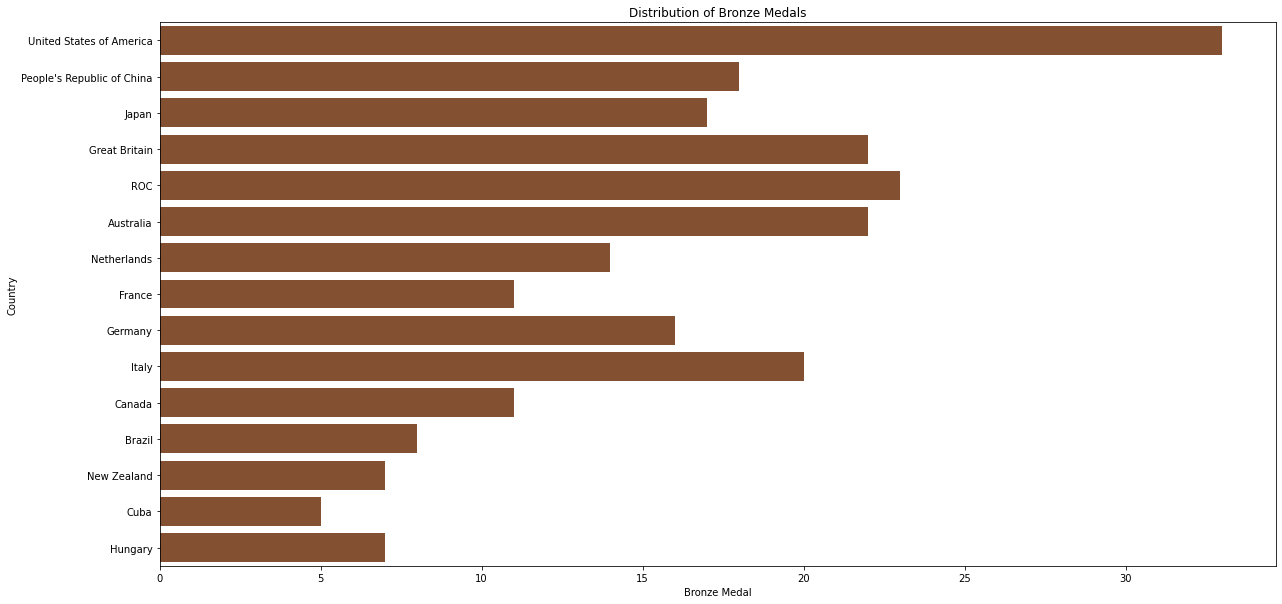

In [20]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.barplot(x='Bronze Medal',y='Country',color = '#914E24',data=df[:15])
plt.title('Distribution of Bronze Medals')
plt.show()

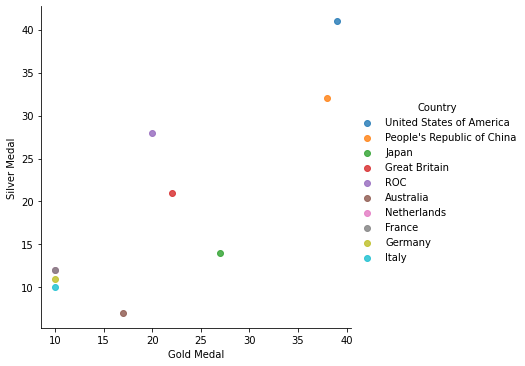

In [21]:
sns.lmplot(x="Gold Medal", y="Silver Medal", hue="Country", data=df[:10])

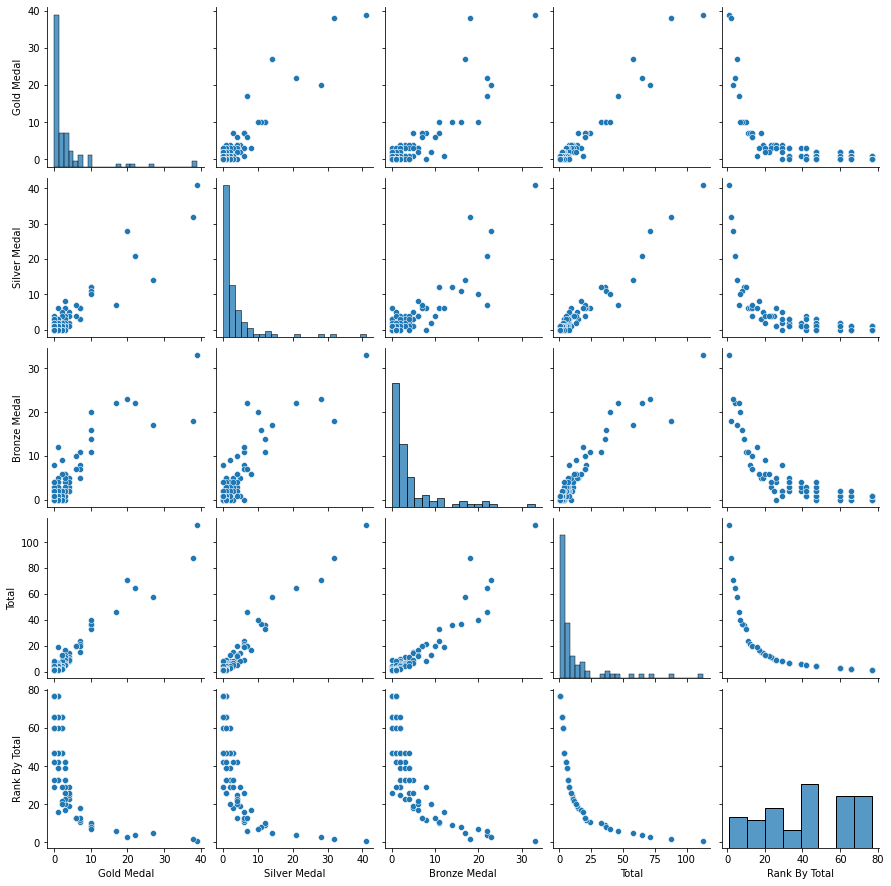

In [22]:
sns.pairplot(df)



# <div align="center">  🥇🥈🥉 🏅 Number of Medals Won by India 🏅 🥇🥈🥉 </div>


India has secured its highest ranking in over four decades (if one were to go by the total number of medals, India would have actually finished 33rd. However, ranking is done primarily based on gold medals won). The previous best in this period was the 51st rank finish at Beijing in 2008, when India won three medals, including Abhinav Bindra's gold.

<img src = "https://images.indianexpress.com/2021/08/WhatsApp-Image-2021-08-08-at-10.21.04.jpeg" >



In [23]:
df_india = df.loc[df['Country']=='India']
df_india

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
47,India,1,2,4,7,33


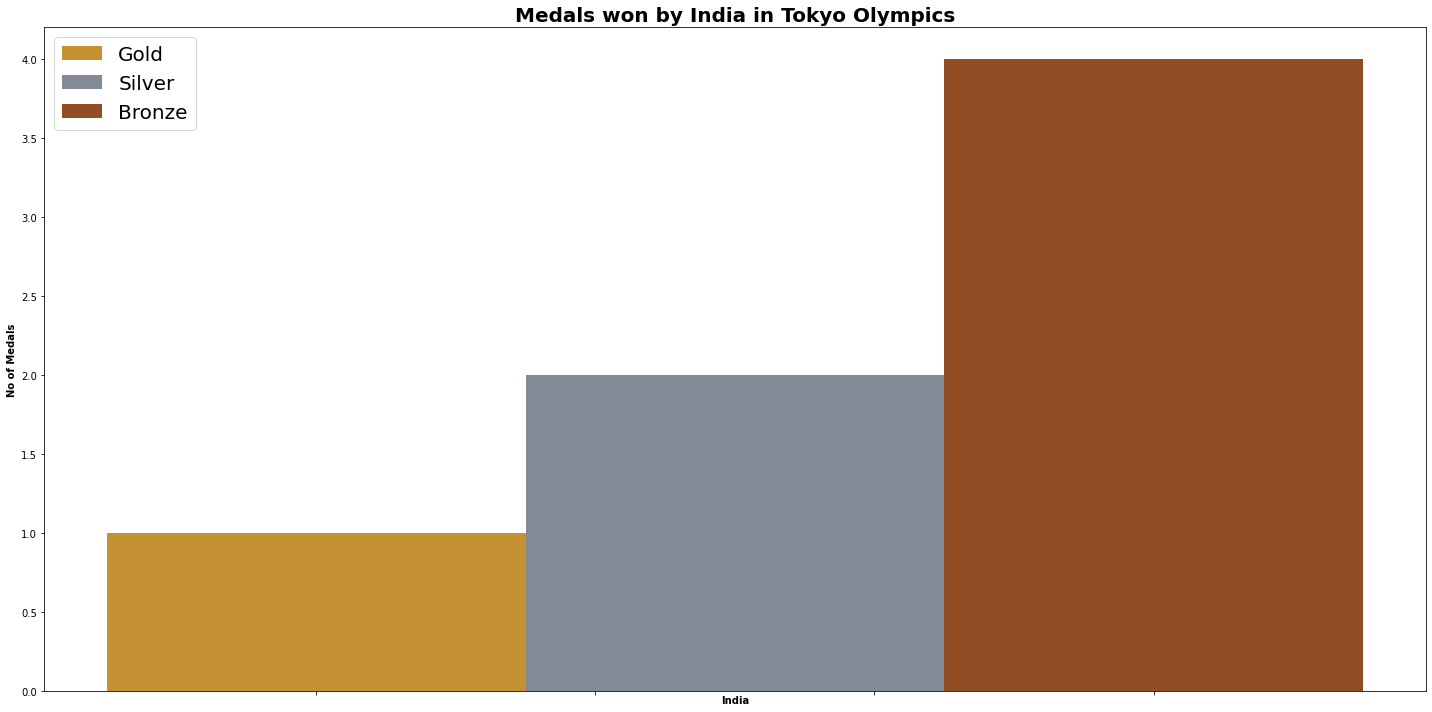

In [24]:
# these two source have been so helpful in understanding how to plot side by side bar plot
# https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# https://www.kaggle.com/sujan97/data-visualization-quick-guide
 
# remove xtick plot
#https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

fig,ax = plt.subplots(figsize = (20,10))


indices = 1#Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis


width = 0.3 #width of bars
ax.bar(ind, df_india['Gold Medal'], data=df_india, width=width, color = '#C49133', label = 'Gold')
ax.bar(ind+width, df_india['Silver Medal'], data=df_india, width=width, color = '#828A95', label = 'Silver')
ax.bar(ind+2*width, df_india['Bronze Medal'], data=df_india, width=width,  color = '#914E24', label = 'Bronze')



plt.title('Medals won by India in Tokyo Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('India', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



#ax.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks(fontsize=14, rotation=45)
#ax.set_xticks(ind + width / 2)

plt.tick_params(axis='x', labelbottom=False)
#plt.xticks(ind+width/2,df_india,fontsize=14,rotation=45)
plt.tight_layout()
plt.show()




## <div align="center">   🌍🏅 Let's see how many countries are participating 🏅 🌍 </div>




<p style="text-align:center">


<img src="https://i.ytimg.com/vi/2_ZHE_Z_8cA/maxresdefault.jpg" width="1080px">
</p>


In [25]:
df.shape

(93, 6)

In [26]:
df['Country'].unique()

array(['United States of America', "People's Republic of China", 'Japan',
       'Great Britain', 'ROC', 'Australia', 'Netherlands', 'France',
       'Germany', 'Italy', 'Canada', 'Brazil', 'New Zealand', 'Cuba',
       'Hungary', 'Republic of Korea', 'Poland', 'Czech Republic',
       'Kenya', 'Norway', 'Jamaica', 'Spain', 'Sweden', 'Switzerland',
       'Denmark', 'Croatia', 'Islamic Republic of Iran', 'Serbia',
       'Belgium', 'Bulgaria', 'Slovenia', 'Uzbekistan', 'Georgia',
       'Chinese Taipei', 'Turkey', 'Greece', 'Uganda', 'Ecuador',
       'Ireland', 'Israel', 'Qatar', 'Bahamas', 'Kosovo', 'Ukraine',
       'Belarus', 'Romania', 'Venezuela', 'India', 'Hong Kong, China',
       'Philippines', 'Slovakia', 'South Africa', 'Austria', 'Egypt',
       'Indonesia', 'Ethiopia', 'Portugal', 'Tunisia', 'Estonia', 'Fiji',
       'Latvia', 'Thailand', 'Bermuda', 'Morocco', 'Puerto Rico',
       'Colombia', 'Azerbaijan', 'Dominican Republic', 'Armenia',
       'Kyrgyzstan', 'Mongolia', 

In [27]:
no_of_countries = len(df['Country'].unique())
no_of_countries

93

In [28]:
df

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
...,...,...,...,...,...,...
88,Ghana,0,0,1,1,77
89,Grenada,0,0,1,1,77
90,Kuwait,0,0,1,1,77
91,Republic of Moldova,0,0,1,1,77


# <div align="center">  🏅 Pie Chart 🏅  </div>



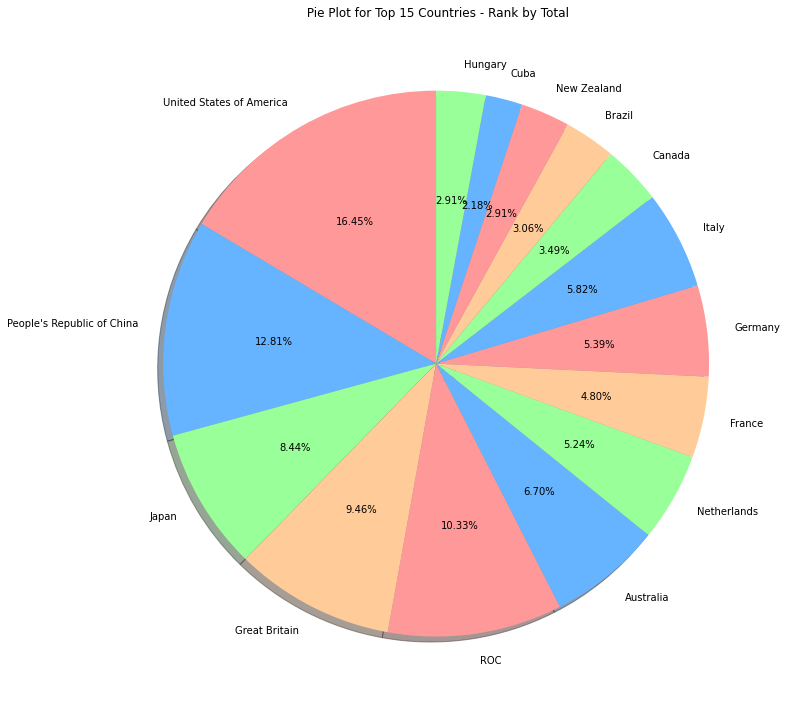

In [29]:
top_15_countries = df['Country'][:15]
top_15_total = df['Total'][:15]


#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

figure = plt.figure(figsize=(15,10))
plt.pie(top_15_total, labels=top_15_countries,
        colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

plt.title(' Pie Plot for Top 15 Countries - Rank by Total')
plt.tight_layout()
plt.show()


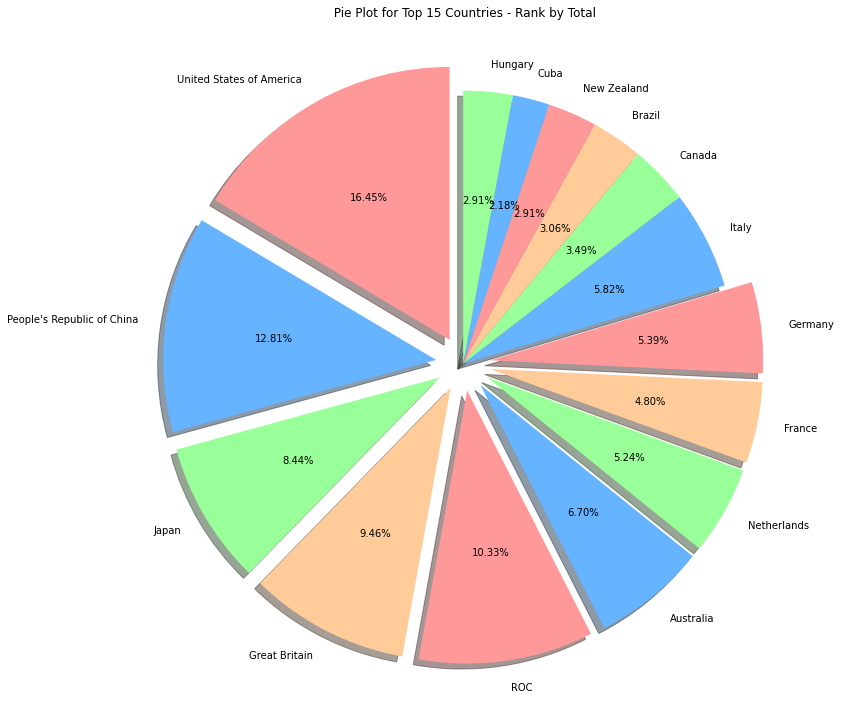

In [30]:
top_15_countries = df['Country'][:15]
top_15_total = df['Total'][:15]

# set value to 0.1 if you wish to highlight particular country else assign 0 
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0)

#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

figure = plt.figure(figsize=(15,10))
plt.pie(top_15_total, labels=top_15_countries,
        explode = explode, colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

plt.title(' Pie Plot for Top 15 Countries - Rank by Total')
plt.tight_layout()
plt.show()


#  <div align="center">  🏅 Donut Chart 🏅  </div>



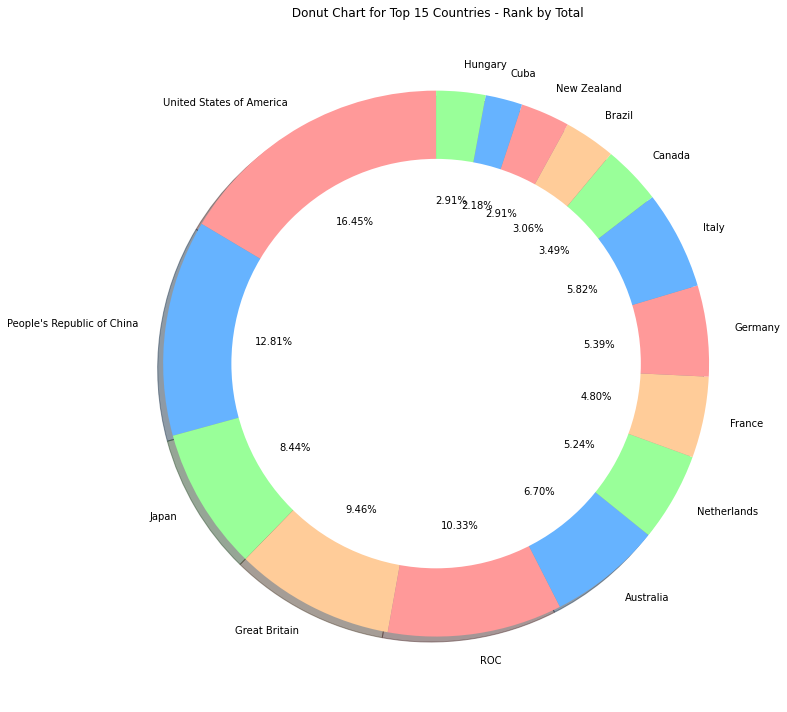

In [31]:
top_15_countries = df['Country'][:15]
top_15_total = df['Total'][:15]


#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

figure = plt.figure(figsize=(15,10))
plt.pie(top_15_total, labels=top_15_countries,
        colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title(' Donut Chart for Top 15 Countries - Rank by Total')
plt.tight_layout()
plt.show()


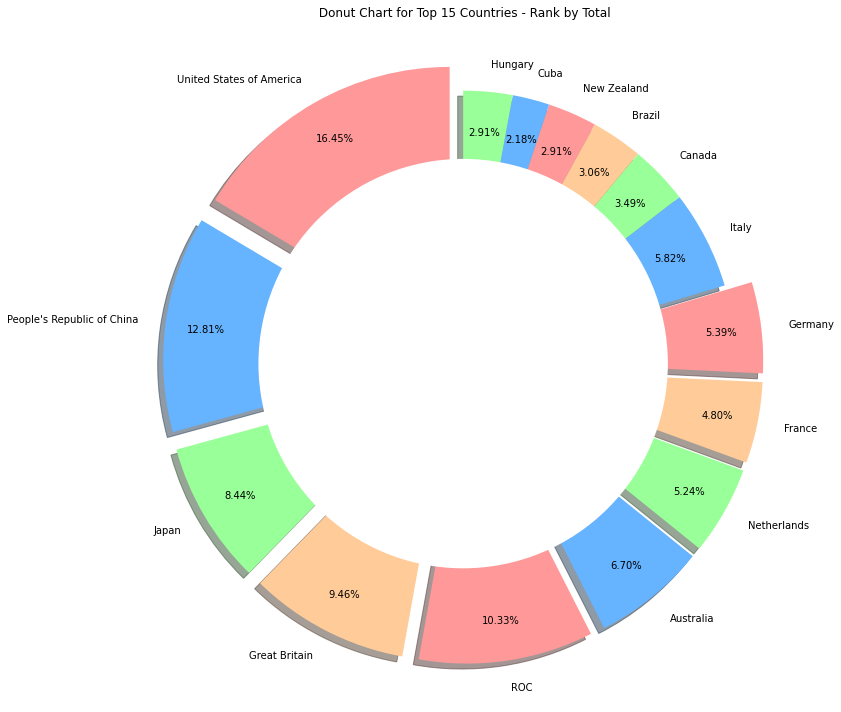

In [32]:
## Donut chart - highlight certain countries 

top_15_countries = df['Country'][:15]
top_15_total = df['Total'][:15]


#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0)

figure = plt.figure(figsize=(15,10))
plt.pie(top_15_total, labels=top_15_countries,
        colors = colors, shadow = True, pctdistance=0.85, startangle = 90, autopct='%1.2f%%',explode=explode)

#draw circle
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.title(' Donut Chart for Top 15 Countries - Rank by Total')
plt.tight_layout()
plt.show()


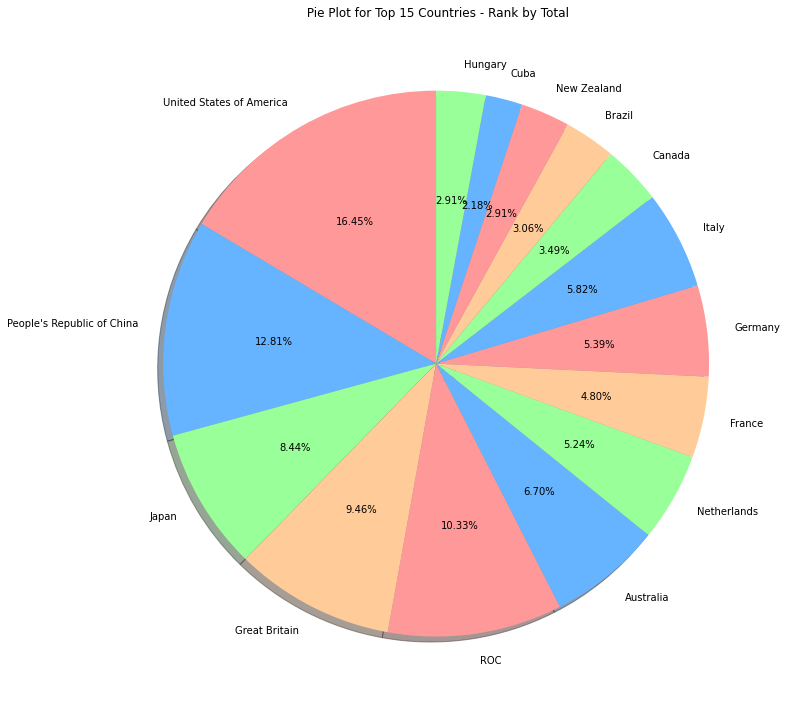

In [33]:
top_15_countries = df['Country'][:15]
top_15_total = df['Total'][:15]



#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

figure = plt.figure(figsize=(15,10))
plt.pie(top_15_total, labels=top_15_countries,
        colors = colors, shadow = True, startangle = 90, autopct='%1.2f%%')

plt.title(' Pie Plot for Top 15 Countries - Rank by Total')
plt.tight_layout()
plt.show()


In [34]:
top_15 = df[:15]
top_15

,Country,Gold Medal,Silver Medal,Bronze Medal,Total,Rank By Total
0,United States of America,39,41,33,113,1
1,People's Republic of China,38,32,18,88,2
2,Japan,27,14,17,58,5
3,Great Britain,22,21,22,65,4
4,ROC,20,28,23,71,3
5,Australia,17,7,22,46,6
6,Netherlands,10,12,14,36,9
7,France,10,12,11,33,10
8,Germany,10,11,16,37,8
9,Italy,10,10,20,40,7





<p style="text-align:center">


<img src="https://64.media.tumblr.com/972ad089bc235f09b9ee7e534b2e7a3d/tumblr_ou0eaqpkBm1uep5pko5_640.gifv" width="1080px">
</p>

#  <div align="center">  🏅 Let's visualize all medals together 🏅  </div>

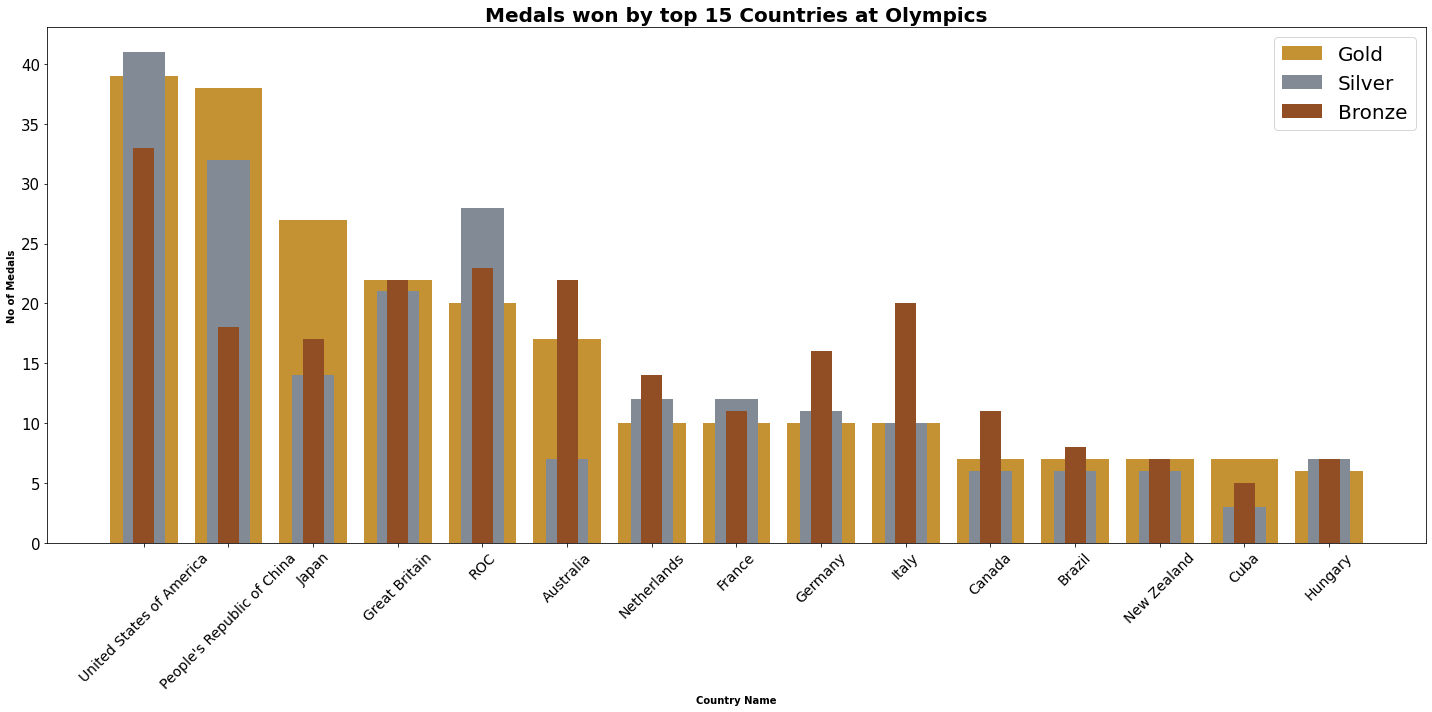

In [35]:

fig,ax = plt.subplots(figsize = (20,10))
plt.bar(top_15['Country'].values, top_15['Gold Medal'].values, color = '#C49133', label = 'Gold',)
plt.bar(top_15['Country'].values, top_15['Silver Medal'].values, width=0.5,color = '#828A95', label = 'Silver')
plt.bar(top_15['Country'].values, top_15['Bronze Medal'].values, width=0.25, color = '#914E24', label = 'Bronze')

plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(fontsize=14, rotation=45)
plt.tight_layout()
plt.show()




We have plotted an overlay graph but it feels a bit messy. Let's see how we can plot medals for each country side by side instead of overlaying it

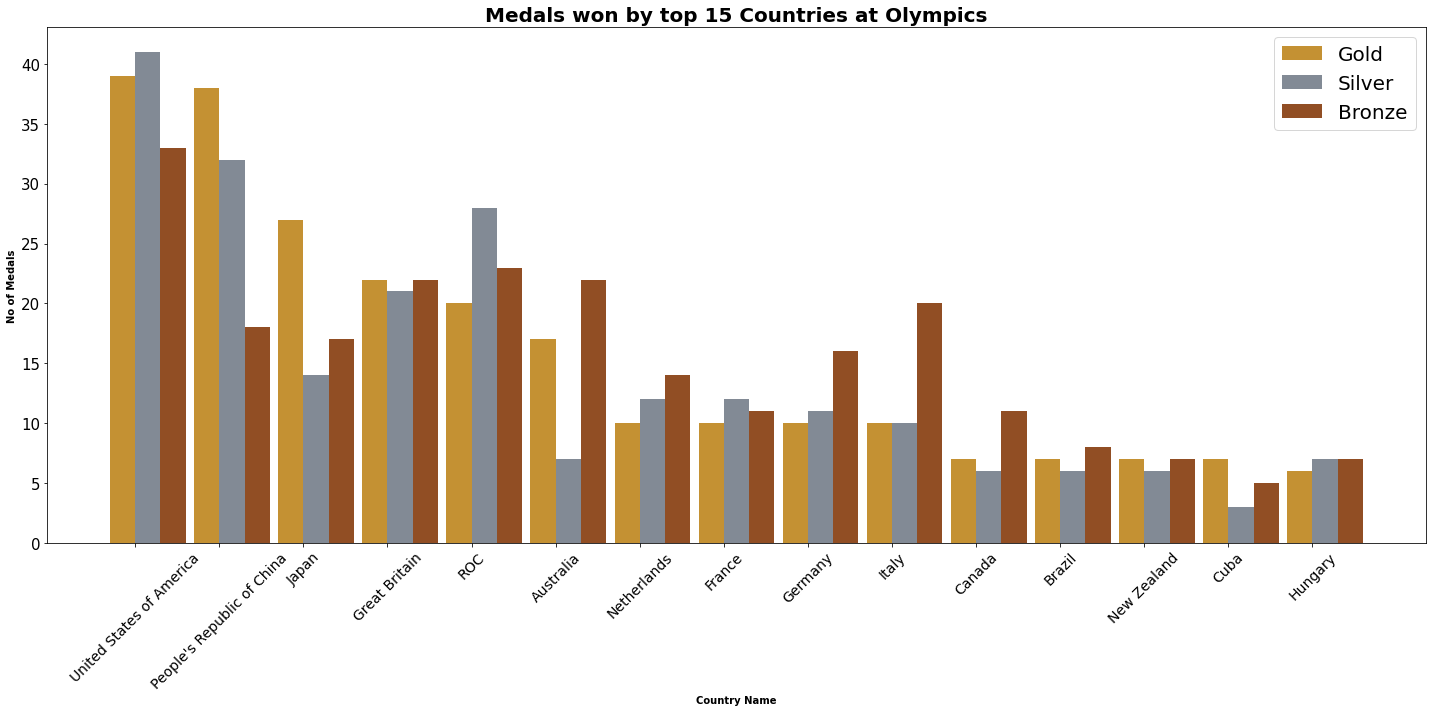

In [36]:
# these two source have been so helpful in understanding how to plot side by side bar plot
# https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# https://www.kaggle.com/sujan97/data-visualization-quick-guide
 

fig,ax = plt.subplots(figsize = (20,10))

top_15_country_names = top_15['Country'].values
top_15_gold_medals = top_15['Gold Medal'].values
top_15_silver_medals = top_15['Silver Medal'].values
top_15_bronze_medals = top_15['Bronze Medal'].values
indices = 15 #Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis


width = 0.3 #width of bars
ax.bar(ind, top_15_gold_medals, data=top_15,width=width,color = '#C49133', label = 'Gold')
ax.bar(ind+width, top_15_silver_medals, data=top_15,width=width,color = '#828A95', label = 'Silver')
ax.bar(ind+2*width, top_15_bronze_medals, data=top_15,width=width, color = '#914E24', label = 'Bronze')



plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



ax.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks(fontsize=14, rotation=45)
#ax.set_xticks(ind + width / 2)


plt.xticks(ind+width/2,top_15_country_names,fontsize=14,rotation=45)
plt.tight_layout()
plt.show()




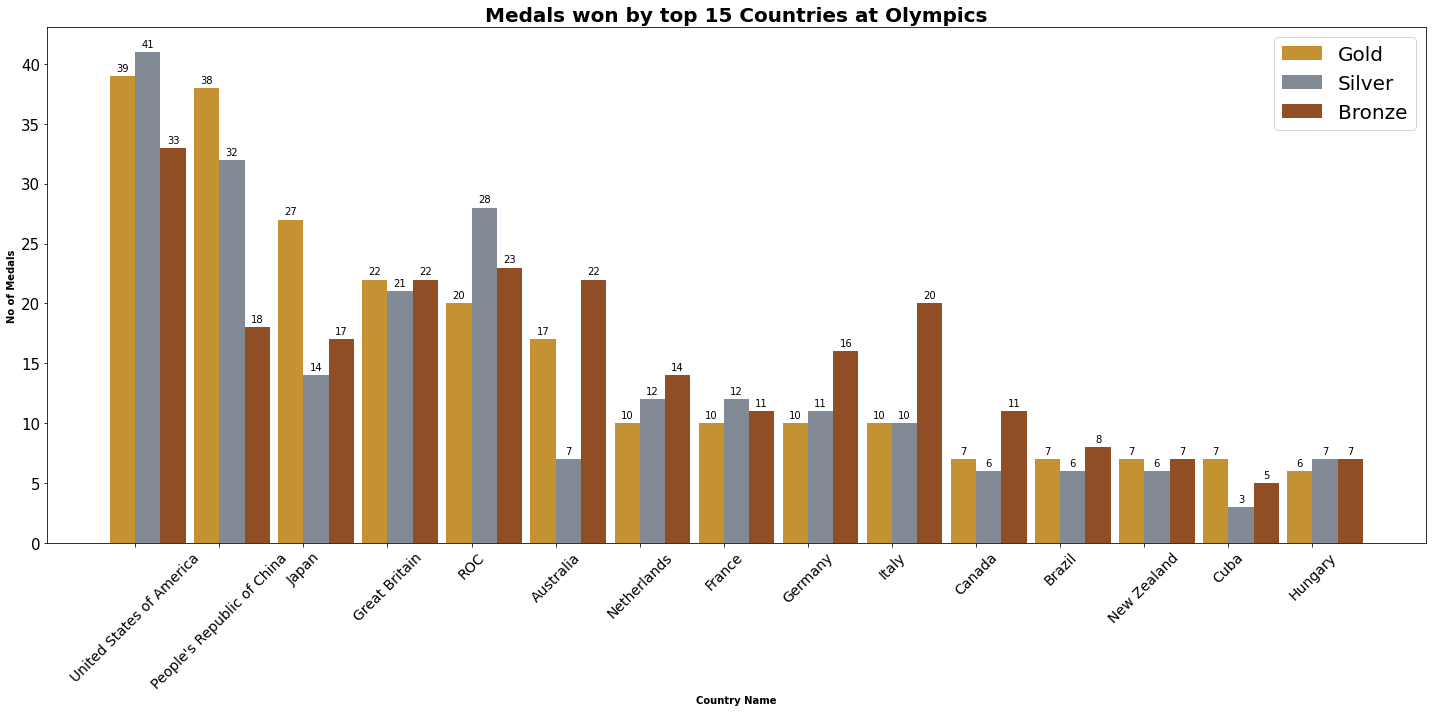

In [37]:
# these two source have been so helpful in understanding how to plot side by side bar plot
# https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged
# https://www.kaggle.com/sujan97/data-visualization-quick-guide

# to add values to each barplot 
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html

fig,ax = plt.subplots(figsize = (20,10))

top_15_country_names = top_15['Country'].values
top_15_gold_medals = top_15['Gold Medal'].values
top_15_silver_medals = top_15['Silver Medal'].values
top_15_bronze_medals = top_15['Bronze Medal'].values
indices = 15 #Numbers of pairs of bars you want
ind = np.arange(indices) #Position of bars on x-axis

 
width = 0.3 #width of bars
rects1 = ax.bar(ind, top_15_gold_medals, data=top_15,width=width,color = '#C49133', label = 'Gold')
rects2 = ax.bar(ind+width, top_15_silver_medals, data=top_15,width=width,color = '#828A95', label = 'Silver')
rects3 = ax.bar(ind+2*width, top_15_bronze_medals, data=top_15,width=width, color = '#914E24', label = 'Bronze')



plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)



ax.tick_params(axis='both', which='major', labelsize=15)
#plt.xticks(fontsize=14, rotation=45)
#ax.set_xticks(ind + width / 2)

# view bar labels
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

plt.xticks(ind+width/2,top_15_country_names,fontsize=14,rotation=45)
plt.tight_layout()
plt.show()




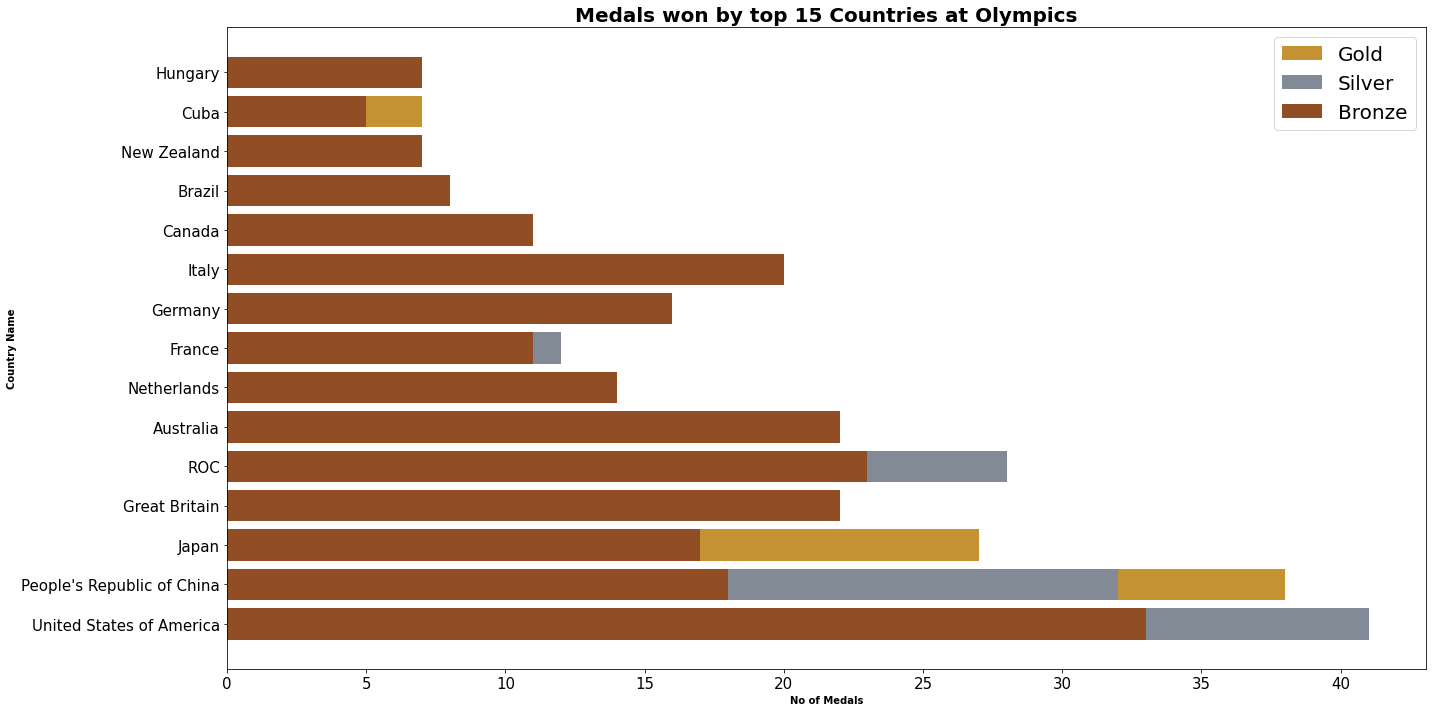

In [38]:
# Horizontal Stacked Barplot

fig,ax = plt.subplots(figsize = (20,10))
plt.barh(top_15['Country'].values, top_15['Gold Medal'].values, color = '#C49133', label = 'Gold')
plt.barh(top_15['Country'].values, top_15['Silver Medal'].values, color = '#828A95', label = 'Silver')
plt.barh(top_15['Country'].values, top_15['Bronze Medal'].values,  color = '#914E24', label = 'Bronze')

plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)


ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()




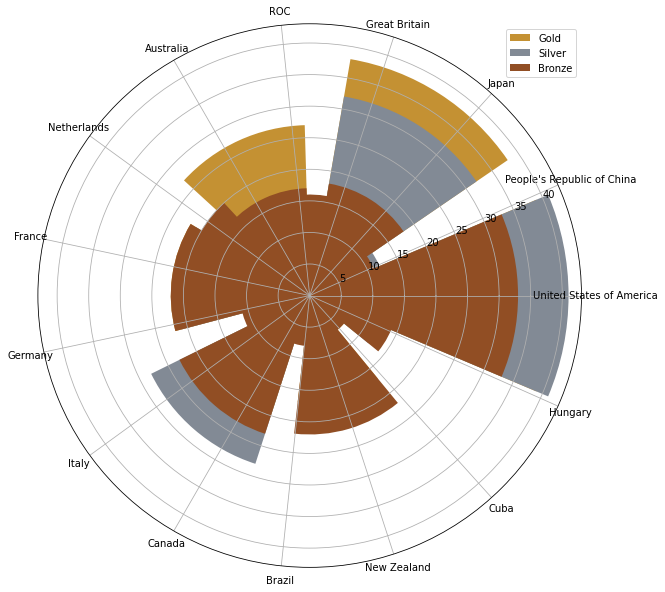

In [39]:
#https://www.pythonprogramming.in/plot-polar-graph-in-matplotlib.html
#https://www.kaggle.com/sujan97/data-visualization-quick-guide

fig,ax=plt.subplots(figsize=(20,10), 
                    subplot_kw=dict(polar=True))

x=top_15_countries
y1= top_15_gold_medals
y2= top_15_silver_medals
y3 = top_15_bronze_medals

theta = np.linspace(0, 2 * np.pi, len(top_15_countries))

# Arrange the grid 
lines, labels = plt.thetagrids(range(0, 360, int(360/len(top_15_countries))), (top_15_countries))

ax.bar(x,y1, label='Gold', color = '#C49133')
ax.bar(x,y2, label='Silver', color = '#828A95')
ax.bar(x,y3, label='Bronze',  color = '#914E24')




ax.legend()
plt.show()

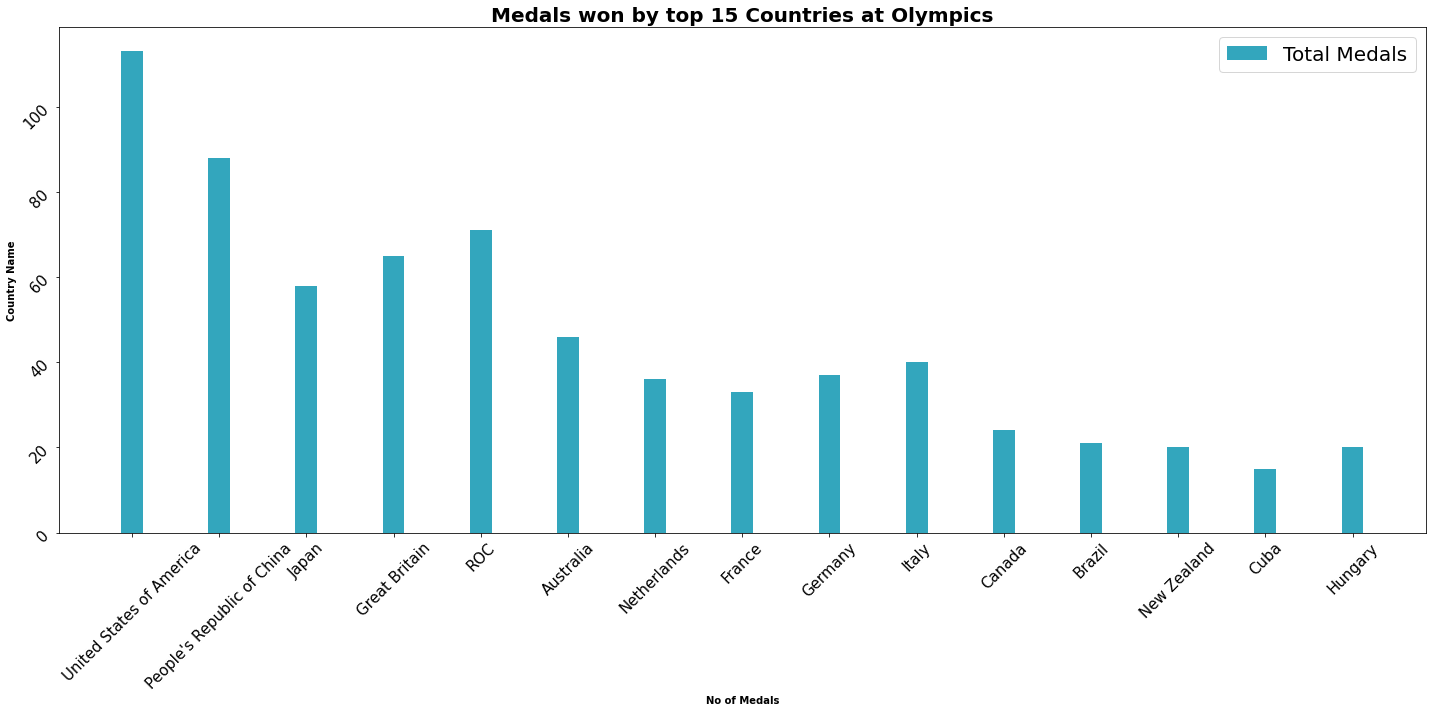

In [40]:

fig,ax = plt.subplots(figsize = (20,10))
plt.bar(top_15['Country'].values, top_15['Total'].values, width=0.25,color = '#33A6BD', label = 'Total Medals')

plt.title('Medals won by top 15 Countries at Olympics', fontweight = 'bold', fontsize=20)
plt.xlabel('No of Medals', fontsize = 10, fontweight = 'bold')
plt.ylabel('Country Name', fontsize = 10, fontweight = 'bold')
plt.legend(fontsize = 20)


ax.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(rotation=45)
plt.tight_layout()
plt.show()




##  🚧⏳Work in Progress 🚧⏳


<p style="text-align:center">


<img src="https://c.tenor.com/DSKt4ancDSMAAAAC/tokyo-olympics.gif" width="1080px">
</p>


<p style="text-align:center">
<img src="https://i.pinimg.com/originals/fb/8d/1a/fb8d1a7076c3c53edec90f141cd660d7.jpg" width="1080px">
</p>

In [41]:
## References 

# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
